In [2]:
!pip install tensorflow

In [0]:
# q = []
# while(1):
#   q.append(1)

In [2]:
'''
Artificial Intelligence : Effort to automate intellectual tasks normally perfomed by humans.
  - can be set of instructions (tic tac toe)
  - can be path search algo (pac man game)

Machine Learning : Takes data and output and figures out rules
  Data    ---ML Rules--
          ---ML Rules--   Rules
  Output  ---ML Rules--

Neural Netowrks : Form of ML that uses layered representation of data.
  - Multi stage information extraction
'''

'\n\n'

In [0]:
'''
Supervised Learning:
  Data has Features -> Labels

Un-supervised Learning:
  Data has Features

Re-inforcement Learning:
  Agent (model)
  Environment
  Reward (when gets close to target, can be +ve or -ve)
'''

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [0]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [4]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocab = dftrain[feature_name].unique();
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary_list=vocab))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)    

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [0]:
def make_ip_fun(df_X, df_y, epoch=10, batch_size=32, shuffel=True):
  def input_fun():
    ds = tf.data.Dataset.from_tensor_slices((dict(df_X), df_y))

    if(shuffel):
      ds = ds.shuffle(1000)

    ds = ds.batch(batch_size).repeat(epoch)
    return ds
  return input_fun

In [18]:
train_ip_fun = make_ip_fun(dftrain, y_train)
eval_ip_fun = make_ip_fun(dfeval, y_eval)

model = tf.estimator.LinearClassifier(feature_columns=feature_columns)
model.train(train_ip_fun)
res = model.evaluate(eval_ip_fun)

clear_output()
print(res['accuracy'])

0.75757575


In [0]:

pred = list(model.predict(eval_ip_fun))
clear_output()

0.53793716


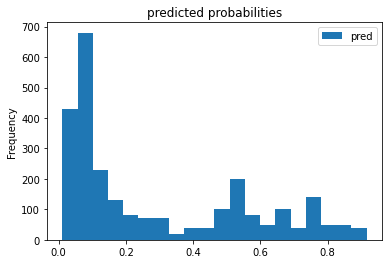

In [38]:
print(pred[0]['probabilities'][1])

predictions = [each_pred['probabilities'][1] for each_pred in pred]
pd.DataFrame(predictions, columns=['pred']).plot(kind='hist', bins=20, title='predicted probabilities')

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# from tensorflow.examples.tutorials.mnist import input_data
print(tf.__version__)

2.2.0-rc2


In [5]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


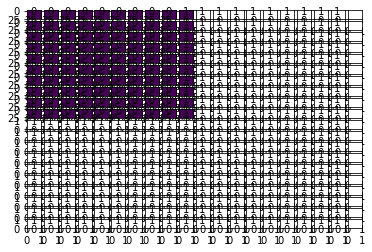

In [11]:
fig, ax = plt.subplots(20,20)

k=0
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(X_train.imag[k].reshape(28,28), aspect='auto')
    k += 1
plt.show()

In [12]:
print("Shape :", X_train.imag.shape)

Shape : (60000, 28, 28)


In [0]:
# print(X_train)